In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from scipy import stats

In [3]:
filename = "data_clean.csv"

In [4]:
df = pd.read_csv(filename)
df.head()

FileNotFoundError: [Errno 2] File b'data_clean.csv' does not exist: b'data_clean.csv'

In [5]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot

Text(0.5, 1.0, 'mileage bins')

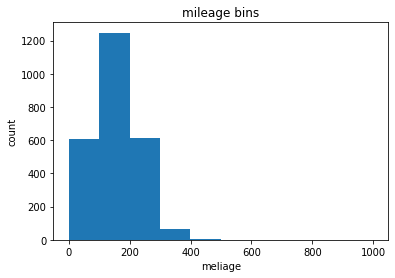

In [6]:
# Plotting mileage distribution
plt.pyplot.hist(df["mileage"])
plt.pyplot.xlabel("meliage")
plt.pyplot.ylabel("count")
plt.pyplot.title("mileage bins")

In [7]:
# Creating bins to plot mileage in more clear way
bins=np.linspace(min(df["mileage"]), max(df["mileage"]), 8)
#bins

array([  0.        , 142.71428571, 285.42857143, 428.14285714,
       570.85714286, 713.57142857, 856.28571429, 999.        ])

In [8]:
group_names = ['0-70', '71-140', '141-210', '211-280', '281-350', '351-420', '421-490']

In [9]:
df["mileage-binned"] = pd.cut(df["mileage"], bins, labels = group_names, include_lowest = True)
#df[["mileage", "mileage-binned"]].head(20)

,mileage,mileage-binned
0,154.0,71-140
1,87.0,0-70
2,96.0,0-70
3,26.0,0-70
4,6.0,0-70
5,56.0,0-70
6,133.0,0-70
7,197.0,71-140
8,60.0,0-70
9,98.0,0-70


In [10]:
# Checking values
df["mileage-binned"].value_counts()
#(df["mileage-binned"] == "0-70").sum()

71-140     1443
0-70       1002
141-210      95
421-490       1
211-280       1
351-420       0
281-350       0
Name: mileage-binned, dtype: int64

In [12]:
#Preparing list of bins sorted by count of values
group_names_sorted = sorted(group_names, key = lambda arg: (df["mileage-binned"] == arg).sum(), reverse = True)
#group_names_sorted

['71-140', '0-70', '141-210', '211-280', '421-490', '281-350', '351-420']

Text(0.5, 1.0, 'mileage bins')

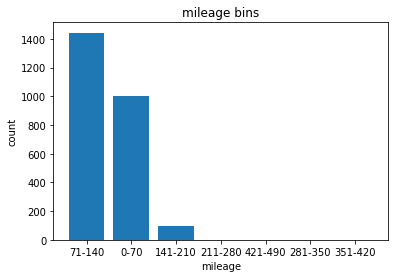

In [13]:
pyplot.bar(group_names_sorted, df["mileage-binned"].value_counts(), width=0.8)
plt.pyplot.xlabel("mileage")
plt.pyplot.ylabel("count")
plt.pyplot.title("mileage bins")

In [14]:
# More simple way to get sorted bins 
mileage_summary = df["mileage-binned"].value_counts()
#mileage_summary
#mileage_summary.index

Text(0.5, 1.0, 'mileage bins')

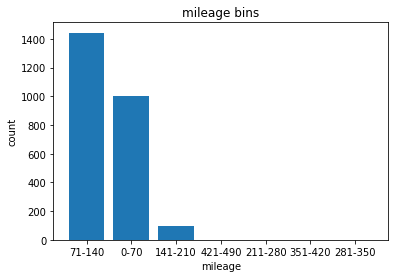

In [16]:
pyplot.bar(mileage_summary.index, mileage_summary.values, width=0.8)
plt.pyplot.xlabel("mileage")
plt.pyplot.ylabel("count")
plt.pyplot.title("mileage bins")

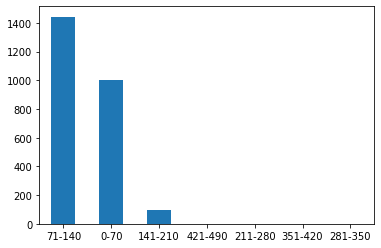

In [17]:
# Another way to plot the distribution using Series.plot
s = pd.Series(df["mileage-binned"].value_counts())
s.plot(kind = 'bar', rot=0)

In [21]:
# Checking correlation between each feature
df.corr()

,Unnamed: 0,Unnamed: 0.1,year,price,mileage,engine_volume,body_type_id,color_id,damaged,repaired,price_usd,high_modification,diesel,gas
Unnamed: 0,1.000000,0.999997,-0.092530,-0.014282,0.058321,-0.076066,0.000741,0.000471,0.000828,0.016512,-0.043195,0.080105,0.003003,-0.003003
Unnamed: 0.1,0.999997,1.000000,-0.092457,-0.014289,0.058261,-0.076075,0.000722,0.000531,0.000780,0.016652,-0.043123,0.079899,0.002914,-0.002914
year,-0.092530,-0.092457,1.000000,0.163431,-0.675520,0.068721,0.020463,0.151660,0.052970,-0.024511,0.821101,-0.154628,-0.208664,0.208664
price,-0.014282,-0.014289,0.163431,1.000000,-0.144411,-0.067879,0.003140,0.036452,-0.019092,-0.009909,0.230500,-0.060765,-0.088604,0.088604
mileage,0.058321,0.058261,-0.675520,-0.144411,1.000000,-0.076851,-0.039348,-0.105360,-0.050041,-0.021103,-0.654026,0.156573,0.450180,-0.450180
engine_volume,-0.076066,-0.076075,0.068721,-0.067879,-0.076851,1.000000,-0.034230,-0.096410,0.066695,-0.017748,0.115326,-0.104097,-0.046739,0.046739
body_type_id,0.000741,0.000722,0.020463,0.003140,-0.039348,-0.034230,1.000000,-0.023547,0.000444,0.000686,0.020846,0.008290,-0.049413,0.049413
color_id,0.000471,0.000531,0.151660,0.036452,-0.105360,-0.096410,-0.023547,1.000000,-0.007866,-0.025090,0.148389,-0.032928,-0.082335,0.082335
damaged,0.000828,0.000780,0.052970,-0.019092,-0.050041,0.066695,0.000444,-0.007866,1.000000,0.228795,-0.087712,-0.005895,-0.049343,0.049343
repaired,0.016512,0.016652,-0.024511,-0.009909,-0.021103,-0.017748,0.000686,-0.025090,0.228795,1.000000,-0.053735,0.022133,-0.028232,0.028232


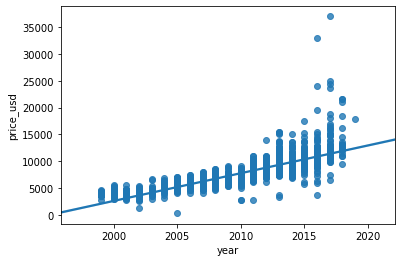

In [22]:
# Regression plot for year and price
sns.regplot(x='year', y='price_usd', data=df)

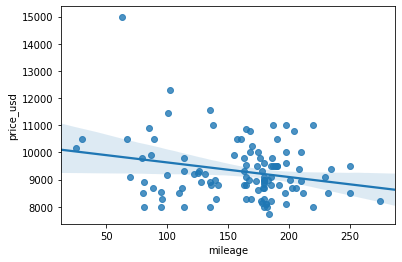

In [28]:
# Regression plot for mileage and price
sns.regplot(x="mileage", y="price_usd", data=df)

In [1]:
sns.boxplot(x="engine_volume", y="price_usd", data=df)

NameError: name 'sns' is not defined

In [32]:
# Grouping data by engine volume and body type
df_volume_body=df[['engine_volume', 'body_type', 'price_usd']]
df_grouped=df_volume_body.groupby(['engine_volume', 'body_type'], as_index=False).mean()
df_grouped

,engine_volume,body_type,price_usd
0,1.0,hatchback,9004.043478
1,1.0,liftbek,9900.000000
2,1.0,sedan,9319.456140
3,1.0,wagon,9481.476190
4,1.6,hatchback,9554.217391
5,1.6,sedan,9118.500000
6,1.6,wagon,9143.087087
7,2.0,hatchback,10259.925000
8,2.0,sedan,9105.734694
9,2.0,wagon,10443.571429


In [33]:
# Grouping as pivot table
grouped_pivot=df_grouped.pivot(index='body_type', columns='engine_volume')
grouped_pivot

price_usd                           
engine_volume          1.0          1.6           2.0
body_type                                            
hatchback      9004.043478  9554.217391  10259.925000
liftbek        9900.000000          NaN           NaN
sedan          9319.456140  9118.500000   9105.734694
wagon          9481.476190  9143.087087  10443.571429

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline 

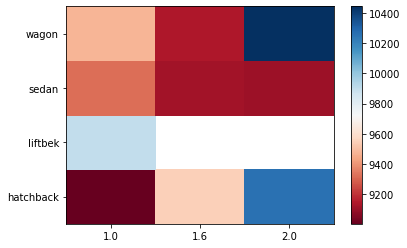

In [36]:
# Heatmap 
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
#plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

In [38]:
# Pearson correlation
pearson_coef, p_value = stats.pearsonr(df['mileage'], df['price_usd'])
print('The Pearson Correlarion Coefficient is ', pearson_coef, ' with a P-value of P= ', p_value)

The Pearson Correlarion Coefficient is  -0.2166497156991409  with a P-value of P=  9.837802731980709e-05
